In [1]:
import pandas
df = pandas.read_excel('CombinedData.xlsx')

In [2]:
df.shape

(53044, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53044 entries, 0 to 53043
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    52664 non-null  object 
 1   label   53042 non-null  float64
dtypes: float64(1), object(1)
memory usage: 828.9+ KB


In [4]:
df.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [5]:
df.tail()

,text,label
53039,Nobody takes me seriously Iâ€™ve (24M) dealt w...,1.0
53040,"selfishness ""I don't feel very good, it's lik...",1.0
53041,Is there any way to sleep better? I can't slee...,1.0
53042,"Public speaking tips? Hi, all. I have to give ...",1.0
53043,I have really bad door 1! It's not about being...,1.0


In [6]:
df['label'].value_counts()

label
1.0    36691
0.0    16351
Name: count, dtype: int64

In [7]:
df.isnull().sum()

text     380
label      2
dtype: int64

In [8]:
df = df.dropna()

In [9]:
duplicates = df[df.duplicated()]

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(51068, 2)

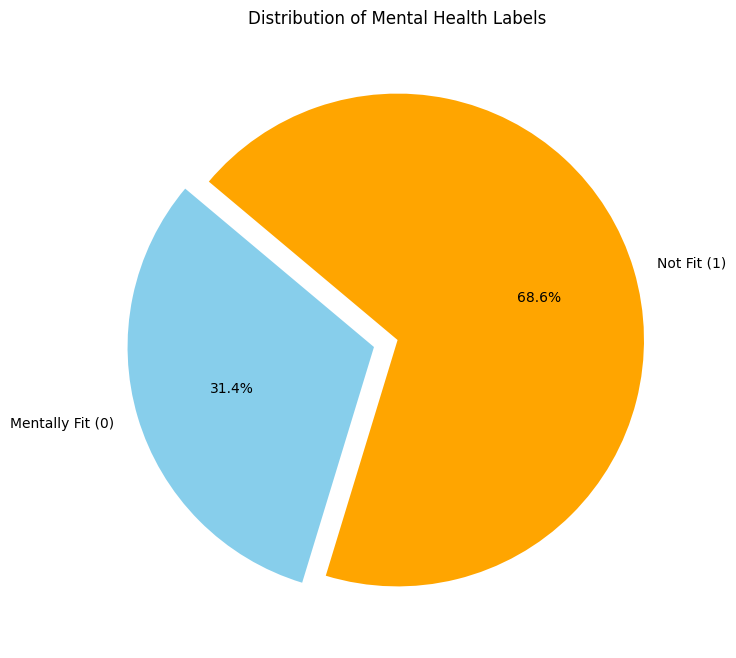

In [12]:
import matplotlib.pyplot as plt

# Count the occurrences of 0s and 1s
label_counts = df['label'].value_counts()

# Define labels and sizes for the pie chart
labels = ['Mentally Fit (0)', 'Not Fit (1)']
sizes = [label_counts[0], label_counts[1]]
colors = ['skyblue', 'orange']
explode = (0.1, 0)  # Slightly "explode" the first slice for emphasis

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of Mental Health Labels')
plt.show()

In [13]:
random_rows = df.sample(n=10)
random_rows

,text,label
3489,Making Deku edit,0.0
34688,"Pain in left thigh/leg and muscle spasms, frea...",1.0
35315,1 the cause of fatigue and other symptoms? Hey...,1.0
38751,i m currently an art student at university and...,1.0
36617,"@jaredleto hey ho, jared! I'm vegan too...hope...",0.0
35637,I am doing much better! Hey guys had an awful ...,1.0
29750,The violence was still happening. The mind gam...,1.0
27084,Someone was strangling me and I thought I was ...,1.0
13452,Since as young as I can remember I have always...,1.0
8344,I have suffered from social 1 and swings of 1 ...,1.0


In [14]:
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ankit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [16]:
import re
import string
from bs4 import BeautifulSoup

def text_cleaner(text, contraction_mapping=None):
    """
    This function cleans the input text by applying the following transformations:
    1. Converts text to lowercase.
    2. Removes HTML tags using BeautifulSoup.
    3. Removes text inside parentheses.
    4. Expands contractions (if contraction_mapping is provided).
    5. Removes possessive 's.
    6. Removes non-alphabetical characters, including punctuation and digits.
    7. Collapses repeated 'm' characters to 'mm'.
    8. Removes extra whitespace.
    9. Removes text inside square brackets and URLs.
    10. Removes newline characters.
    
    Args:
    - text (str): Input text to be cleaned.
    - contraction_mapping (dict, optional): Dictionary to expand contractions.
    
    Returns:
    - str: Cleaned text.
    """
    
    # Convert text to lowercase
    text = text.lower()

    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "lxml").text

    # Remove text inside parentheses
    text = re.sub(r'\([^)]*\)', '', text)

    # Remove text inside square brackets 
    text = re.sub(r'\[.*?\]', '', text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Expand contractions (if mapping provided)
    if contraction_mapping:
        text = ' '.join([contraction_mapping.get(word, word) for word in text.split()])

    # Remove possessive 's (e.g., "John's" -> "John")
    text = re.sub(r"'s\b", "", text)

    # Remove non-alphabetical characters (keeping spaces)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)

    # Collapse repeated 'm' characters (e.g., "mmmm" -> "mm")
    text = re.sub(r"[m]{2,}", "mm", text)

    # Remove newline characters
    text = re.sub(r'\n', ' ', text)

    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove extra whitespace (replace multiple spaces with a single space)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [17]:
df['cleaned'] = df["text"].apply(lambda x: text_cleaner(x, contraction_mapping))

/tmp/ipykernel_5743/404321258.py:31: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


In [18]:
random_rows = df.sample(n=10)
random_rows

,text,label,cleaned
35354,"Weight loss Hello,\n\nI'm new to this sub and ...",1.0,weight loss hello i am new to this sub and hop...
17048,I thought I was getting better with my 1 and s...,1.0,i thought i was getting better with my and sel...
21629,"No family, no friends, no colleagues. Everythi...",1.0,no family no friends no colleagues everything ...
35927,@Maddierawrk Sorry for your loss. This post ga...,1.0,maddierawrk sorry for your loss this post gave...
48457,we're all a work in progress One of the most s...,1.0,we are all a work in progress one of the most ...
51041,Noticing negative behaviours while talking to ...,1.0,noticing negative behaviours while talking to ...
22683,Just got rejected across the board at law scho...,1.0,just got rejected across the board at law scho...
44781,milkymoomoo yuk end of year account i need to ...,0.0,milkymoomoo yuk end of year account i need to ...
10225,because i never get any actual advice from my ...,1.0,because i never get any actual advice from my ...
9020,Hello fellow redditors!First of all stay stron...,1.0,hello fellow redditors first of all stay stron...


In [19]:
# from wordcloud import WordCloud
# import matplotlib as mpl
# mpl.rcParams['figure.figsize'] = 20,8
# word_cloud = ""
# random_rows = df['cleaned'].sample(n=5000, random_state=42)
# for row in random_rows:
#     for word in row:
#         word_cloud+=" ".join(word)
# wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
# plt.imshow(wordcloud)

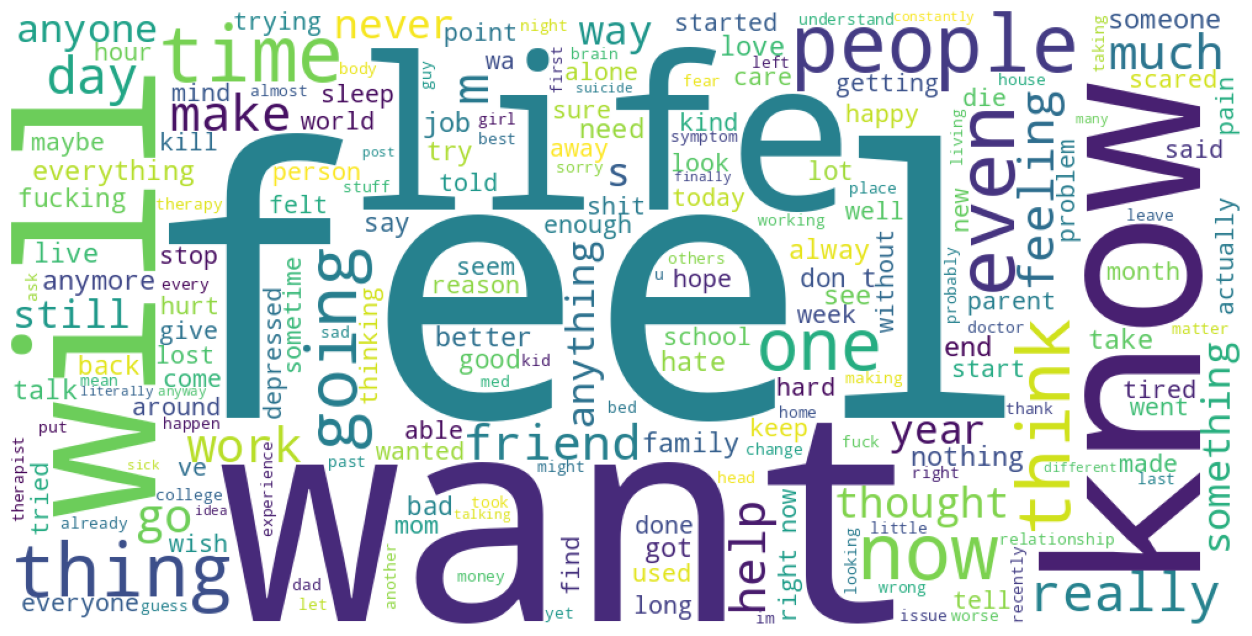

In [20]:
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""

# Filter rows where the label column is 1 and sample 500 rows
random_rows = df[df['label'] == 1]['cleaned'].sample(n=5000, random_state=42)

# Generate the word cloud string
for row in random_rows:
    for word in row:
        word_cloud += " ".join(word)

# Create the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', min_font_size=6).generate(word_cloud)

# Display the word cloud
plt.imshow(wordcloud)
plt.axis("off")  # Optional: Turn off axis labels
plt.show()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
X = df.cleaned
y = df.label
vect = CountVectorizer(max_features = 50000 , ngram_range=(1,2))

In [22]:
# X_cv =vect.fit_transform(X).toarray()

In [23]:
# print(X_cv.shape)  # Output the shape: (number_of_documents, number_of_features)

In [24]:
# # Get the vocabulary terms (features)
# features = vect.get_feature_names_out()

# # Print the top 10 features
# print(features[:10])


In [25]:
# print(X_cv[500:510, 1000:1010])  # Rows 500-509 and columns 1000-1009


In [26]:
# import numpy as np

# # Count the number of 1's in the matrix
# num_ones = np.sum(X_cv == 1)

# # Count the number of 0's in the matrix
# num_zeros = np.sum(X_cv == 0)

# # Print the results
# print(f"Number of 1's: {num_ones}")
# print(f"Number of 0's: {num_zeros}")


In [27]:
X_cv =vect.fit_transform(X)

In [28]:
X_cv.shape

(51068, 50000)

In [29]:
# Count the number of 1's
num_ones = (X_cv == 1).sum()

# Count the total number of elements (rows * columns)
total_elements = X_cv.shape[0] * X_cv.shape[1]

# Count the number of non-zero elements
num_non_zero = X_cv.count_nonzero()

# Calculate the number of 0's
num_zeros = total_elements - num_non_zero

print(f"Number of 1's: {num_ones}")
print(f"Number of 0's: {num_zeros}")


Number of 1's: 5172656
Number of 0's: 2547185818


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 1,stratify = y)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [32]:
import seaborn as sns
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set_theme(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')
    
    return accuracy

In [33]:
model_names = []
accuracies = []

Accuracy : 0.9409633835911494

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      3208
         1.0       0.97      0.94      0.96      7006

    accuracy                           0.94     10214
   macro avg       0.93      0.94      0.93     10214
weighted avg       0.94      0.94      0.94     10214

   ------------ Confusion Matrix -------------- 


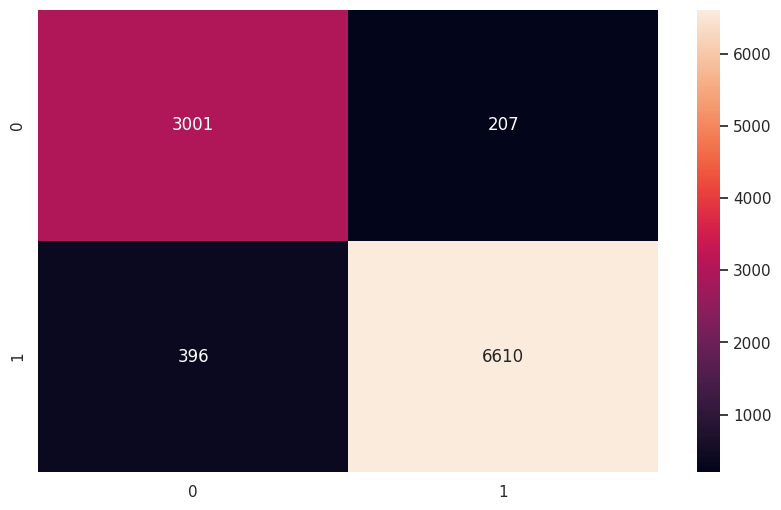

In [34]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
accuracy_lr = performance_eval(clf_lr,X_test)
model_names.append("Logistic Regression")
accuracies.append(accuracy_lr)

Accuracy : 0.8666536126884669

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78      3208
         1.0       0.89      0.92      0.90      7006

    accuracy                           0.87     10214
   macro avg       0.85      0.84      0.84     10214
weighted avg       0.86      0.87      0.87     10214

   ------------ Confusion Matrix -------------- 


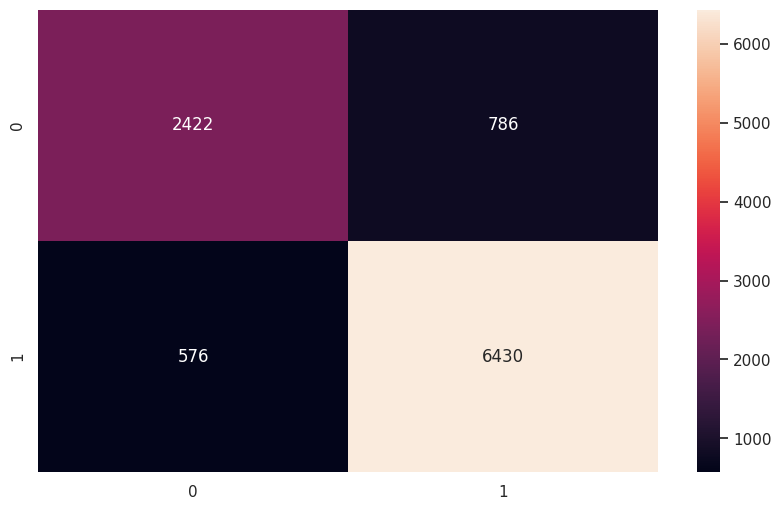

In [35]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
accuracy_nb = performance_eval(clf_nb,X_test)
model_names.append("Naive Bayes")
accuracies.append(accuracy_nb)

Accuracy : 0.8819267671822988

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81      3208
         1.0       0.92      0.91      0.91      7006

    accuracy                           0.88     10214
   macro avg       0.86      0.87      0.86     10214
weighted avg       0.88      0.88      0.88     10214

   ------------ Confusion Matrix -------------- 


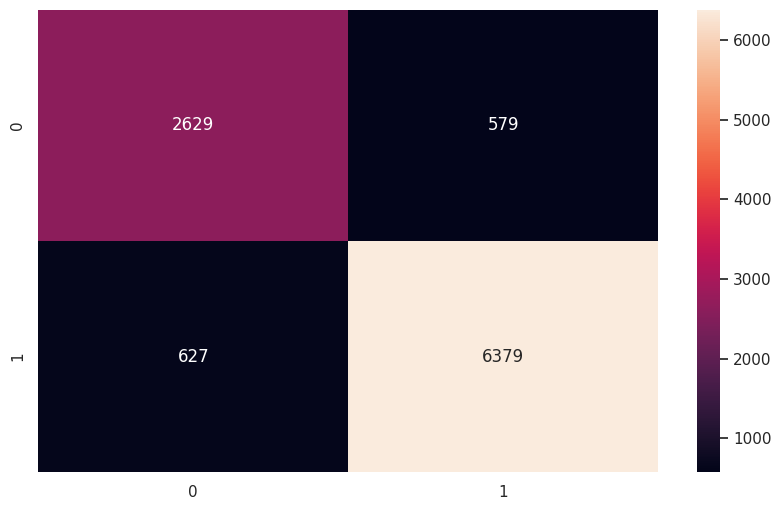

In [36]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
accuracy_dt = performance_eval(clf_dt,X_test)
model_names.append("Decision Tree")
accuracies.append(accuracy_dt)

Accuracy : 0.6936557665948698

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.51      0.99      0.67      3208
         1.0       0.99      0.56      0.71      7006

    accuracy                           0.69     10214
   macro avg       0.75      0.77      0.69     10214
weighted avg       0.84      0.69      0.70     10214

   ------------ Confusion Matrix -------------- 


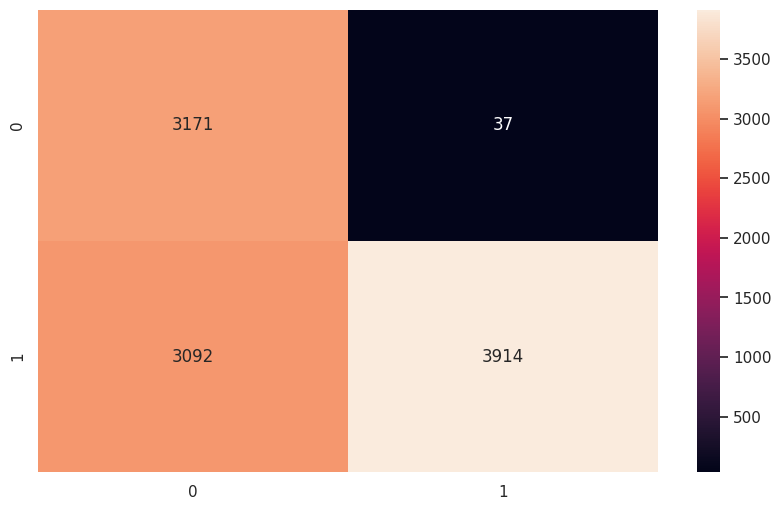

In [37]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
accuracy_knn = performance_eval(clf_knn,X_test)
model_names.append("KNN")
accuracies.append(accuracy_knn)

Accuracy : 0.9167808889759154

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      3208
         1.0       0.95      0.93      0.94      7006

    accuracy                           0.92     10214
   macro avg       0.90      0.91      0.90     10214
weighted avg       0.92      0.92      0.92     10214

   ------------ Confusion Matrix -------------- 


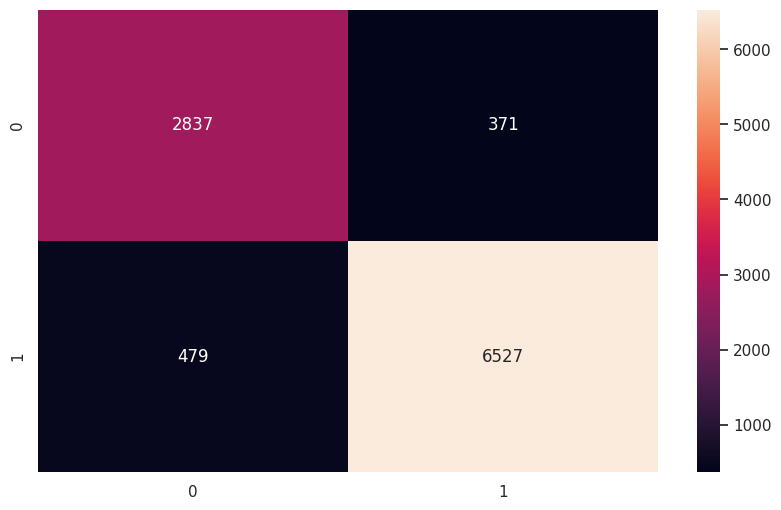

In [38]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
accuracy_rf = performance_eval(clf_rf,X_test)
model_names.append("Random Forest")
accuracies.append(accuracy_rf)

Accuracy : 0.9314666144507538

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      3208
         1.0       0.97      0.93      0.95      7006

    accuracy                           0.93     10214
   macro avg       0.91      0.93      0.92     10214
weighted avg       0.93      0.93      0.93     10214

   ------------ Confusion Matrix -------------- 


0.9314666144507538

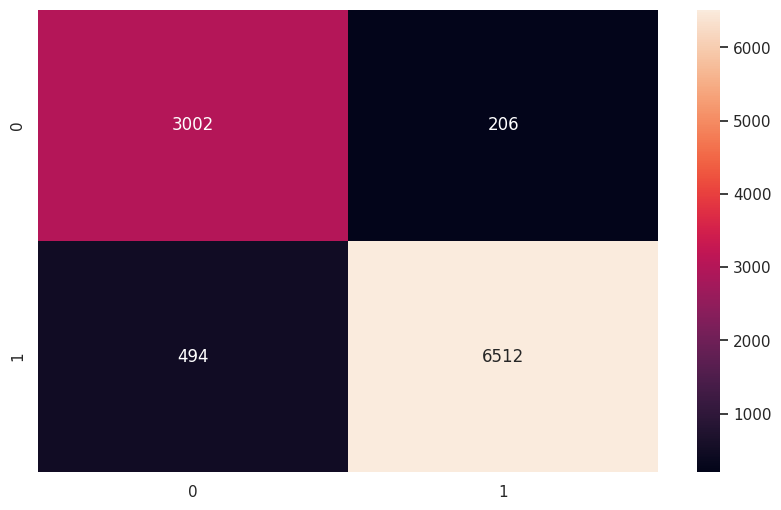

In [39]:
voting_clf = VotingClassifier(estimators=[
                                          ('LogReg', clf_lr),
                                          ('RF', clf_rf),
                                          ('KNN',clf_knn),
                                          ('NB',clf_nb),
                                          ('DT',clf_dt)
                                         ],
                              voting='hard'
                             )
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

In [40]:
import pickle
filename = 'CV_BestModel.sav'
pickle.dump(voting_clf, open(filename, 'wb'))
pickle.dump(vect,open('vectorizer.pkl','wb'))

In [41]:
text = "I am happy"

In [42]:
clean_text = text_cleaner(text)
clean_text

'i am happy'

In [43]:
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

In [44]:
output = {0:"fit",
          1:"UnFit"}
print(output[single_prediction])

fit


['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'KNN', 'Random Forest']
[0.9409633835911494, 0.8666536126884669, 0.8819267671822988, 0.6936557665948698, 0.9167808889759154]


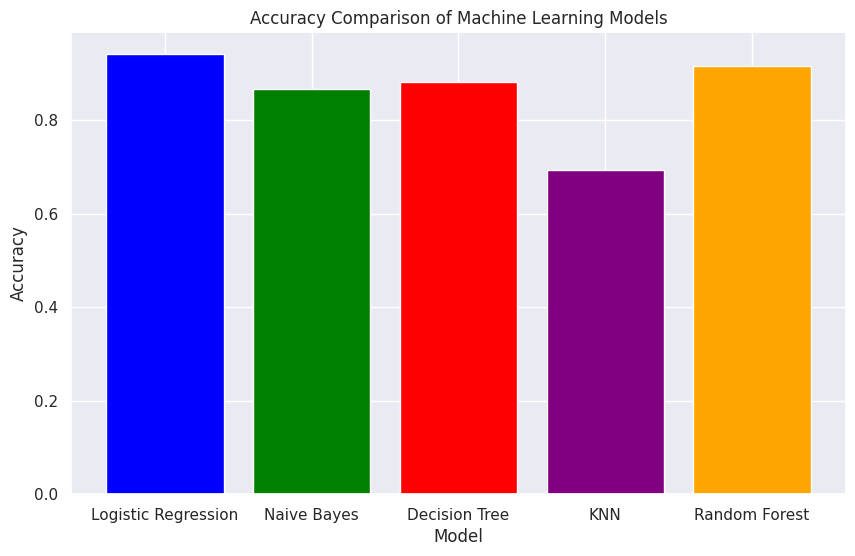

In [45]:
print(model_names)
print(accuracies)

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])

plt.title('Accuracy Comparison of Machine Learning Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.show()